<a href="https://colab.research.google.com/github/wdon021/Comp261_A5/blob/master/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
# import scipy.misc as smp
from PIL import Image as im
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image, display

# circle

In [ ]:
# Test for circle function out of bound
# for i in range(333):
#   k = np.random.random_sample(size=2)
#   col_random = np.int(16*k[0])+6
#   row_random = np.int(16*k[1])+6
#   cr = 5
#   print("col_max{0}, col_min{1}, row_max{2}, row_min{3}".format(col_random+cr, col_random-cr, row_random+cr, row_random-cr))
#   if(((col_random+cr)>=28) | ((col_random-cr)<1)):
#     print("col_random is out of bound")
#   if(((row_random+cr)>=28) | ((row_random-cr)<1)):
#     print("row_random is out of bound")

In [2]:
def create_circle_random(size = 28, radius = 5, color = 255):
  k = np.random.random_sample(size=2)
  col_random = np.int(16*k[0])+6
  row_random = np.int(16*k[1])+6
  data = np.zeros((size, size), dtype = np.uint8)
  ci,cj = row_random, col_random
  cr = radius
  if(((col_random+cr)>=28) | ((col_random-cr)<1)):
    print("col_random is out of bound")
  if(((row_random+cr)>=28) | ((row_random-cr)<1)):
    print("row_random is out of bound")
  I,J = np.meshgrid(np.arange(data.shape[0]), np.arange(data.shape[1]))
  # basic formula for a circle (x - a)**2 + (y - b)**2 = r**2
  # calculate the radius
  dist = np.sqrt((I-ci)**2 +(J-cj)**2)
  # Assign value of any for those points within radius
  data[np.where(dist<cr)] = color
  # img = im.fromarray(data)
  return data.flatten()

In [ ]:
def create_circle(size, rows, cols, radius, color):
  data = np.zeros((size, size), dtype = np.uint8)
  ci,cj = rows, cols
  cr = radius
  I,J = np.meshgrid(np.arange(data.shape[0]), np.arange(data.shape[1]))
  # basic formula for a circle (x - a)**2 + (y - b)**2 = r**2
  # calculate the radius
  dist = np.sqrt((I-ci)**2 +(J-cj)**2)
  # Assign value of any for those points within radius
  data[np.where(dist<cr)] = color
  img = im.fromarray(data)
  return data, img

In [ ]:
plot1, img1 = create_circle(28, 15, 10, 5, 255)

In [ ]:
img1

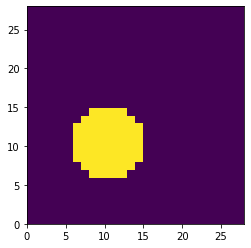

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.pcolormesh(plot1)
ax.set_aspect('equal')
plt.show()

### Rectangle


In [ ]:
def rect(size, start_x, start_y, color):
  data = np.zeros((size, size), dtype = np.uint8)
  rows = start_x + 4 
  cols = start_y + 8
  data[start_x:rows, start_y:cols] = color
  img = im.fromarray(data)
  return data,img

In [3]:
def rect_x_y(height, width):
  k = np.random.random_sample(size=2)
  start_x = np.int(27*k[0])
  start_y = np.int(27*k[1])
  rows = start_x + height 
  cols = start_y + width
  return start_x, start_y, rows, cols


In [4]:
def rect_random(size, color):
  data = np.zeros((size, size), dtype = np.uint8)
  # x1, y1, x2, y2 = 0, 0, 0, 0
  x1, y1, x2, y2 = rect_x_y(4, 8)
  # print([x1, y1, x2, y2 ])
  while((x2 >=28)|(y2 >=28)):
    x1, y1, x2, y2 = rect_x_y(4, 8)
  # print([x1, y1, x2, y2 ])
  data[x1:x2, y1:y2] = color
  # img = im.fromarray(data)
  return data.flatten()
  # return img

In [ ]:
rect_random(28, 255)

[3, 22, 7, 30]
[5, 17, 9, 25]


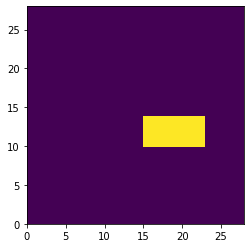

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.pcolormesh(recData)
ax.set_aspect('equal')
plt.show()

### Triangles

In [ ]:
def triangle(size, start_x, start_y, color, diagonals = -1):
  data = np.zeros((size, size), dtype = np.uint8)
  # define a rectangle
  rows = start_x + 8 
  cols = start_y + 8
  data[start_x:rows, start_y:cols] = color
  # return lower triangle of rectangle
  data[start_x:rows, start_y:cols] = np.tril(data[start_x:rows, start_y:cols], diagonals)
  # return upper half triangle of rectangle
  # data[start_x:rows, start_y:cols] = np.triu(data[start_x:rows, start_y:cols], diagonals)
  img = im.fromarray(data)
  return data, img

In [5]:
def triang_ran(size, color, diagonals = -1):
  data = np.zeros((size, size), dtype = np.uint8)
  # define a rectangle
  start_x, start_y, rows, cols = rect_x_y(8, 8)
  # print([start_x, start_y, rows, cols])
  while((rows >=28)|(cols >=28)):
    start_x, start_y, rows, cols = rect_x_y(8, 8)
  # print([start_x, start_y, rows, cols])
  data[start_x:rows, start_y:cols] = color
  # return lower triangle of rectangle
  data[start_x:rows, start_y:cols] = np.tril(data[start_x:rows, start_y:cols], diagonals)
  # return upper half triangle of rectangle
  # data[start_x:rows, start_y:cols] = np.triu(data[start_x:rows, start_y:cols], diagonals)
  # img = im.fromarray(data)
  # return img
  return data.flatten()

In [ ]:
triaData, triaImg = triangle(28, 10, 12, 255)

In [ ]:
triaImg

### Random generate 

In [6]:
def random_shape():
  data = np.array([])
  name = ""
  prob = np.random.random_sample()
  if(prob<= 0.33333333333333333):
    data = create_circle_random(28, 5, 255)
    name = "C"
  elif((prob> 0.33333333333333333) & (prob<= 0.66666666666666666)):
    data = rect_random(28, 255)
    name = "R"
  else:
    data = triang_ran(28, 255)
    name = 'T'
  return data, name

#### Load data

In [ ]:
# img = im.fromarray(np.reshape(shape_vect[0], (-1, 28)))
# img

In [7]:
def random_generate(size):
  shape_vect = []
  shape_name = []
  for i in range(size):
    s_vect, s_name = random_shape()
    shape_vect.append(s_vect)
    shape_name.append(s_name)
  num_2d_shape = np.array(shape_vect).reshape(-1, 784)
  return num_2d_shape, shape_name

In [8]:
train_shape, train_name =  random_generate(20)

In [9]:
test_shape, test_name =  random_generate(10)

### Simple example of CNN

In [10]:
from keras.utils.np_utils import to_categorical

Normalization  CNN converg faster on [0..1] data than on [0..255].

In [11]:
train_shape_N = train_shape/255.0
test_shape_N = test_shape/255.0

Reshape

In [12]:
train_shape_R = train_shape_N.reshape(-1, 28, 28, 1)

In [13]:
test_shape_R = test_shape_N.reshape(-1, 28, 28, 1)

Label encoding

In [14]:
shape = ['C', "T", "R"]

In [15]:
# Mapping 
mapping = {}
for x in range(len(shape)):
  mapping[shape[x]] = x

In [16]:
mapping

{'C': 0, 'R': 2, 'T': 1}

In [17]:
# Integer representation
for x in range(len(train_name)):
  train_name[x] = mapping[train_name[x]]

In [18]:
y = to_categorical(train_name)

split training and validation set

In [19]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(train_shape_R, y, test_size = 0.2, random_state = 0)

Data visualization

In [21]:
X_train__ = x_train.reshape(X_train.shape[0], 28, 28)

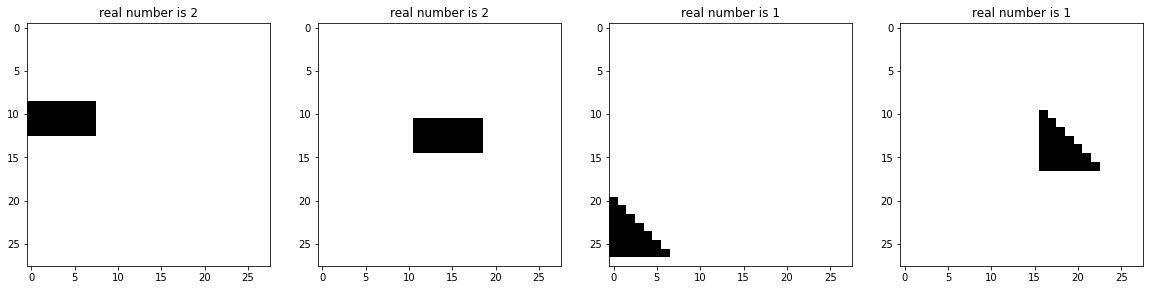

In [22]:
fig, axis = plt.subplots(1, 4, figsize = (20, 10))
for i, ax in enumerate(axis.flat):
  ax.imshow(X_train__[i], cmap = 'binary')
  digit = y_train[i].argmax()
  ax.set(title = f"real number is {digit}")

normalization

In [23]:
mean = np.mean(X_train)
std = np.std(X_train)
def standardize(x):
  return(x - mean)/std

In [34]:
epoch = 2
batch_sizes = 3

Define the model
Conv (filter)
32 filters for the 2* conv2D layers
64 filters for the two second layers
128 filters for two third layers 
256 for the last ones

Pooling

Maxpooling 2D - Downsampling filter
- reduce overfitting

Convolutional + pooling layers allow CNN to combine local features and learn more global features of image.

Flatten layer - Convert the final feature maps into a one single 1D vector. - Allow you make use of fully connected layer.


In [42]:
from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

In [43]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size= (3, 3), activation="relu", input_shape = (28, 28, 1)))
model.add(Conv2D(filters=64, kernel_size= (3, 3), activation="relu", input_shape = (28, 28, 1)))

In [44]:
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation = 'relu'))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation = 'relu'))

model.add(MaxPooling2D(pool_size= (2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation = 'relu'))

In [45]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [46]:
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(3, activation= "softmax"))
model.compile(loss= "categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

Data augmentation
- alter the training data with small transformation to reproduce the variations occuring when drawing the rectangle?
- alter the training data in ways that change the array representation while keeping the label the same.
- Popular augmentations: grayscales, horizontal flips, vertical flips, random crops, color jitters, translation, rotations.

In [47]:
datagen = ImageDataGenerator(featurewise_center=False, samplewise_center = False,
                             featurewise_std_normalization =False, samplewise_std_normalization = False,
                             zca_whitening = False, rotation_range = 10, horizontal_flip = True, vertical_flip = True)

- Randomly rotate some training images by 10%
- randomly horizontal flip some training image
- randomly vertical flip some training image
- I did not apply zoom in nor shift image hirzontally or vertically, because object has random position in the image, some very near the side, zoom in or shift images may make the object dispear.

In [48]:
# transform the image data
train_gen = datagen.flow(X_train, y_train, batch_size=batch_sizes)
test_gen = datagen.flow(X_test, y_test, batch_size=batch_sizes)

#### Model training

In [40]:
batch_size

3

In [49]:
history = model.fit_generator(generator=train_gen, epochs= epoch, steps_per_epoch= X_train.shape[0] // batch_size, validation_data=test_gen, validation_steps = X_test.shape[0] // batch_size)

Epoch 1/2
5/5 [==============================] - 0s 78ms/step - loss: 1.7493 - accuracy: 0.4615 - val_loss: 1.0127 - val_accuracy: 0.6667
Epoch 2/2
5/5 [==============================] - 0s 34ms/step - loss: 2.3848 - accuracy: 0.3077 - val_loss: 0.9160 - val_accuracy: 1.0000
